In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [41]:
# Reading uber Request Data
uberdf = pd.read_csv('Uber Request Data.csv')

In [4]:
uberdf

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [42]:
#printing information about uberdf dataframe
uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [11]:
# correcting data types
uberdf['Request timestamp'] = pd.to_datetime(uberdf['Request timestamp'])
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
# correcting data types
uberdf['Drop timestamp'] = pd.to_datetime(uberdf['Drop timestamp'])
uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [13]:
# removing unnecessary columns
uberdf = uberdf.drop(['Driver id'], axis=1)
uberdf.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [43]:
# prints 5 rows(by default) of a data frame.
uberdf.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [16]:
# How many unique pickup points are present in uberdf?
print(uberdf['Pickup point'].unique())

['Airport' 'City']


In [18]:
# How many observations are present in uberdf?
uberdf.shape

(6745, 5)

In [19]:
# Inspecting the Null values , column-wise
uberdf.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [20]:
# This cell goes on to show that the Drop timestamp rows are empty when the Status is No Cars Available or Cancelled.
#  Since the trips did not happen in those cases, the Drop timestamp can not be available, hence the null values here are valid.
uberdf[(uberdf['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [21]:
print(len(uberdf['Request id'].unique()))
print(len(uberdf['Pickup point'].unique()))
print(len(uberdf['Status'].unique()))

6745
2
3


In [22]:
# Checking if there are any duplicate values
len(uberdf[uberdf.duplicated()].index)

0

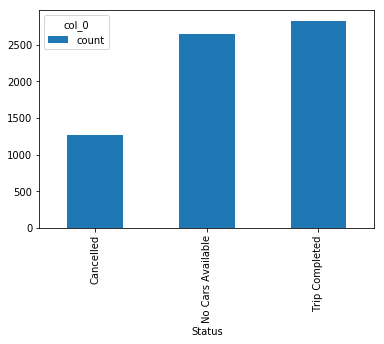

In [23]:
# Univariate analysis on Status column 
status = pd.crosstab(index = uberdf["Status"], columns="count")     
status.plot.bar()

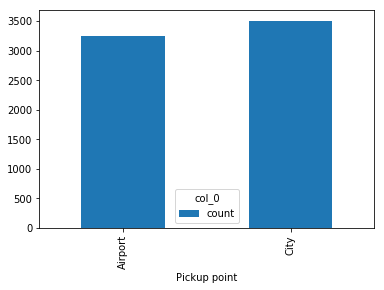

In [24]:
# Univariate analysis on Pickup Point column 
pick_point = pd.crosstab(index = uberdf["Pickup point"], columns="count")     
pick_point.plot.bar()

In [25]:
# Bivariate Analysis
# grouping by Status and Pickup point.
uberdf.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

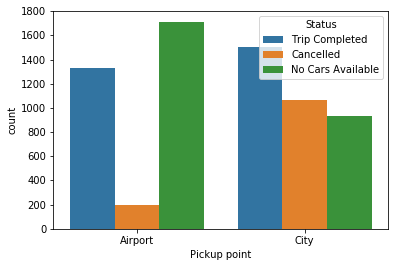

In [26]:
# Visualizing the count of Status and Pickup point bivariate analysis
sns.countplot(x=uberdf['Pickup point'],hue =uberdf['Status'] ,data = uberdf)

In [28]:
# Deriving new metrics
# Request and Drop hours
uberdf['Request Hour'] = uberdf['Request timestamp'].dt.hour

In [29]:
# Time Slots
uberdf['Request Time Slot'] = 'Early Morning'
uberdf.loc[uberdf['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uberdf.loc[uberdf['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uberdf.loc[uberdf['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uberdf.loc[uberdf['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uberdf.loc[uberdf['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [30]:
# As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
uberdf['Demand'] = 1

In [31]:
# As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply
# value trips completed and 0 otherwise.
uberdf['Supply'] = 0
uberdf.loc[(uberdf['Status'] == 'Trip Completed'),'Supply'] = 1

In [32]:
# Demand Supply Gap can be defined as a difference between Demand and Supply
uberdf['Gap'] = uberdf['Demand'] - uberdf['Supply']
uberdf.loc[uberdf['Gap']==0,'Gap'] = 'Trip Completed'
uberdf.loc[uberdf['Gap']==1,'Gap'] = 'Trip Not Completed'

In [33]:
# Removing unnecessary columns
uberdf = uberdf.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

In [34]:
uberdf.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


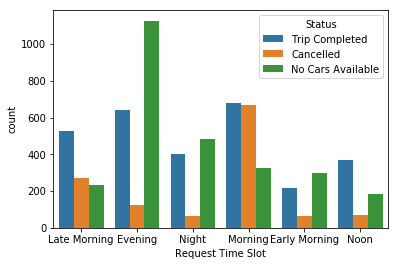

In [35]:
# graphical 
# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=uberdf['Request Time Slot'],hue =uberdf['Status'] ,data = uberdf)

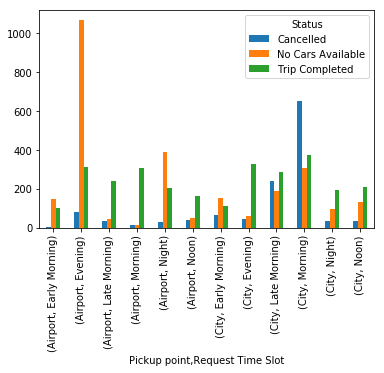

In [36]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(uberdf.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

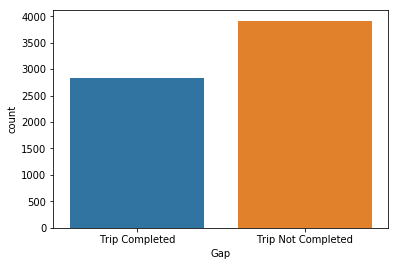

In [37]:
# Plot to count the number of requests that was completed and which was not completed.
sns.countplot(x=uberdf['Gap'], data = uberdf)

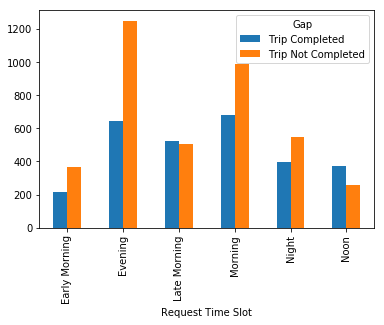

In [38]:
# Plot to count the number of requests that was completed and which was not completed, against the time slot
gap_timeslot_df = pd.DataFrame(uberdf.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

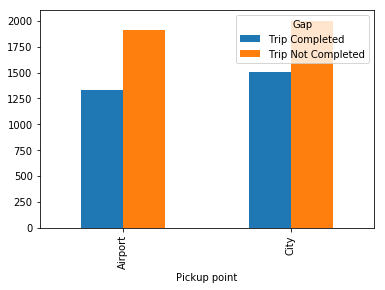

In [39]:
# Plot to count the number of requests that was completed and which was not completed, against pickup point
gap_pickup_df = pd.DataFrame(uberdf.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

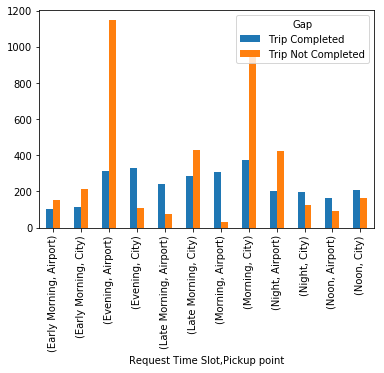

In [40]:
# Plot to count the number of requests that was completed and which was not completed, for the final analysis
gap_main_df = pd.DataFrame(uberdf.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()